In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_train_features = pd.read_csv("./RawTrainFeatures.csv")
raw_test_features = pd.read_csv("./RawTestFeatures.csv")
train_labels = pd.read_csv("./TrainLabels.csv")

# 缺失数据的数量
raw_train_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [87]:
raw_test_features.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [88]:
train_labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [89]:
# 对于数值型数据，用均值填充缺失数据
# 对于非数值型数据，用众数填充数据
for colName, data in raw_train_features.items():
    if (raw_train_features[colName].dtype != "object"):
        raw_train_features[colName].fillna(round(raw_train_features[colName].mean()), inplace=True)
        raw_test_features[colName].fillna(round(raw_test_features[colName].mean()), inplace=True)
    else:
        raw_train_features[colName].fillna(raw_train_features[colName].mode()[0], inplace=True)
        raw_test_features[colName].fillna(raw_test_features[colName].mode()[0], inplace=True)

In [90]:
# 观察各个特征的取值情况
for colName, data in raw_train_features.items():
    print(colName + ":")
    print(raw_train_features[colName].unique())

respondent_id:
[    0     1     2 ... 26704 26705 26706]
h1n1_concern:
[1. 3. 2. 0.]
h1n1_knowledge:
[0. 2. 1.]
behavioral_antiviral_meds:
[0. 1.]
behavioral_avoidance:
[0. 1.]
behavioral_face_mask:
[0. 1.]
behavioral_wash_hands:
[0. 1.]
behavioral_large_gatherings:
[0. 1.]
behavioral_outside_home:
[1. 0.]
behavioral_touch_face:
[1. 0.]
doctor_recc_h1n1:
[0. 1.]
doctor_recc_seasonal:
[0. 1.]
chronic_med_condition:
[0. 1.]
child_under_6_months:
[0. 1.]
health_worker:
[0. 1.]
health_insurance:
[1. 0.]
opinion_h1n1_vacc_effective:
[3. 5. 4. 2. 1.]
opinion_h1n1_risk:
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc:
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective:
[2. 4. 5. 3. 1.]
opinion_seas_risk:
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc:
[2. 4. 1. 5. 3.]
age_group:
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education:
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
race:
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex:
['Female' 'Male']


<Axes: xlabel='h1n1_concern', ylabel='Count'>

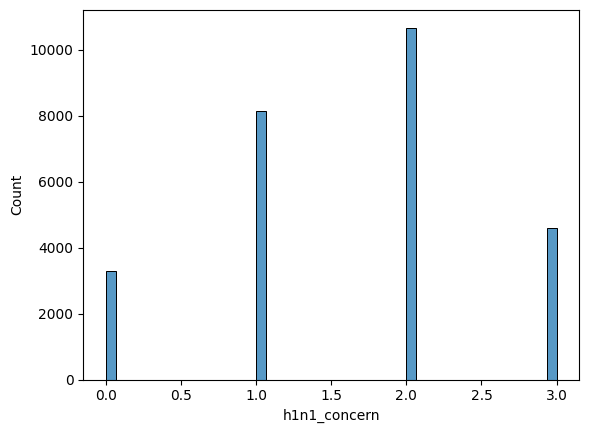

In [91]:
sns.histplot(data=raw_train_features['h1n1_concern'])
# 大部分人对于H1N1流感只保持些许担心的程度

<Axes: xlabel='h1n1_knowledge', ylabel='Count'>

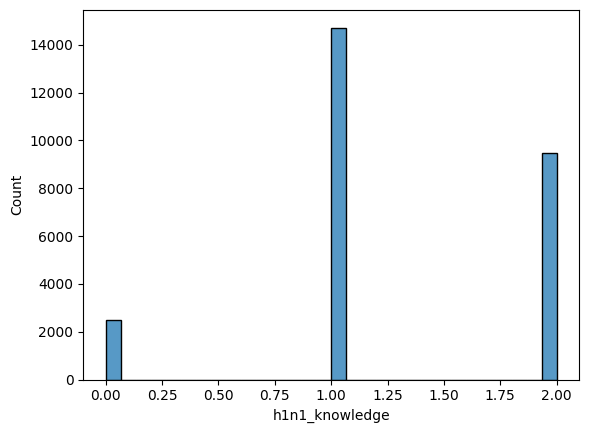

In [92]:
sns.histplot(data=raw_train_features['h1n1_knowledge'])
# 大多数人对于H1N1流感或多或少都有了解

<Axes: xlabel='behavioral_antiviral_meds', ylabel='Count'>

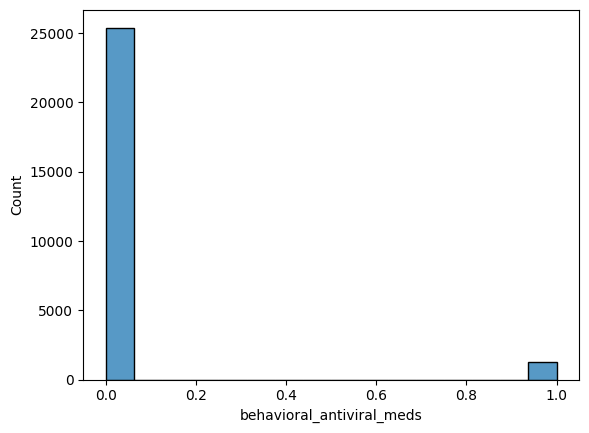

In [93]:
sns.histplot(data=raw_train_features['behavioral_antiviral_meds'])
# 只有少部分人服用了抗病毒药物

<Axes: xlabel='behavioral_avoidance', ylabel='Count'>

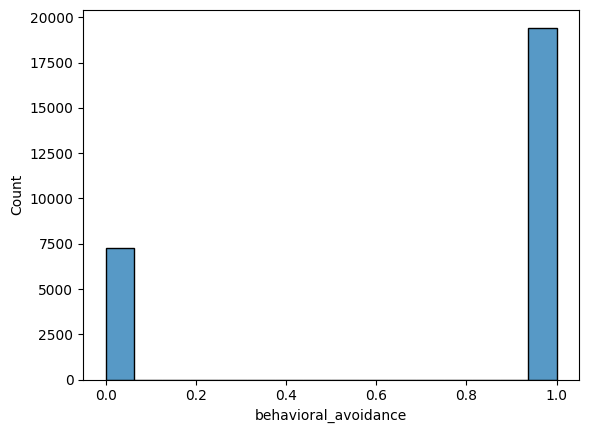

In [94]:
sns.histplot(data=raw_train_features['behavioral_avoidance'])
# 多数人会自觉远离患病人群

<Axes: xlabel='behavioral_face_mask', ylabel='Count'>

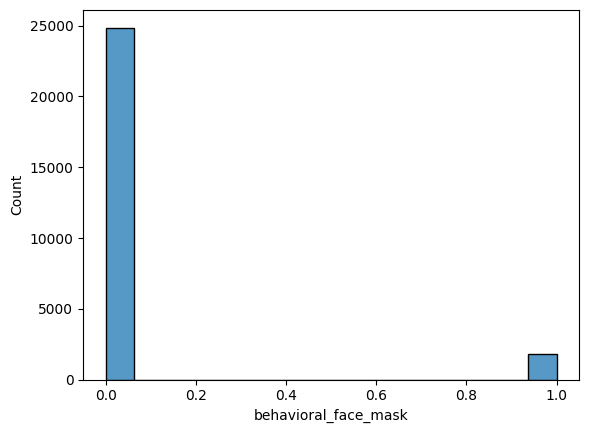

In [95]:
sns.histplot(data=raw_train_features['behavioral_face_mask'])
# 只有少数人会买口罩

<Axes: xlabel='behavioral_wash_hands', ylabel='Count'>

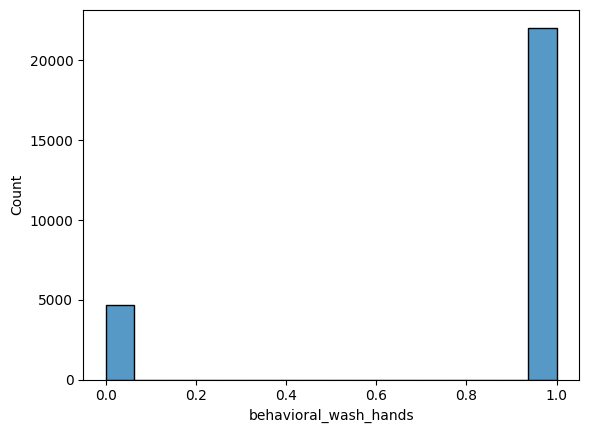

In [96]:
sns.histplot(data=raw_train_features['behavioral_wash_hands'])
# 大多数人保持洗手

<Axes: xlabel='behavioral_large_gatherings', ylabel='Count'>

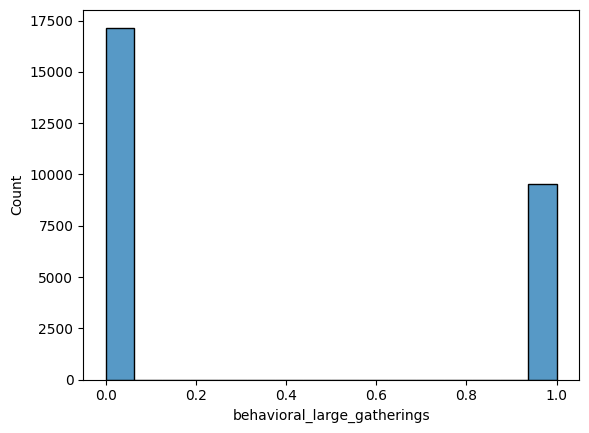

In [97]:
sns.histplot(data=raw_train_features['behavioral_large_gatherings'])
# 大约三分之一的人会远离聚集人群

<Axes: xlabel='behavioral_outside_home', ylabel='Count'>

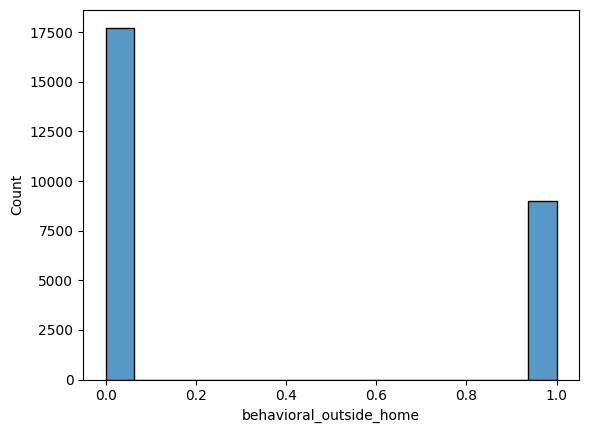

In [98]:
sns.histplot(data=raw_train_features['behavioral_outside_home'])
# 大约三分之一的人会减少与家庭之外的人接触

<Axes: xlabel='behavioral_touch_face', ylabel='Count'>

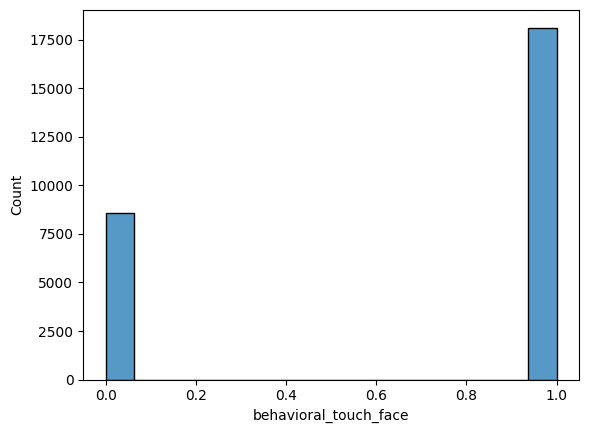

In [99]:
sns.histplot(data=raw_train_features['behavioral_touch_face'])
# 大约三分之二的人会避免触碰眼鼻口

<Axes: xlabel='doctor_recc_h1n1', ylabel='Count'>

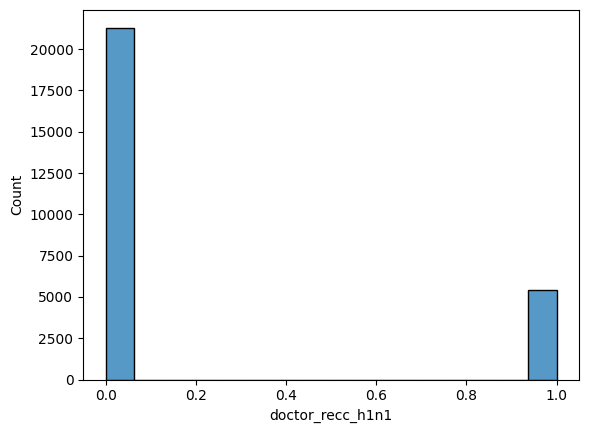

In [100]:
sns.histplot(data=raw_train_features['doctor_recc_h1n1'])
# 只有少数人接种的H1N1流感疫苗为医生推荐的疫苗

<Axes: xlabel='doctor_recc_seasonal', ylabel='Count'>

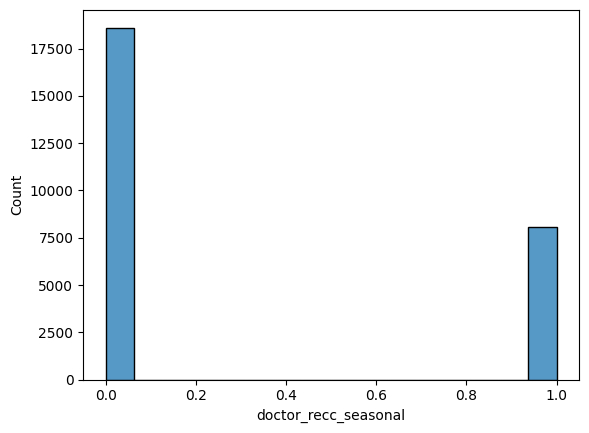

In [101]:
sns.histplot(data=raw_train_features['doctor_recc_seasonal'])
# 大约有三分之一的人接种的季节性流感疫苗为医生推荐的疫苗

<Axes: xlabel='chronic_med_condition', ylabel='Count'>

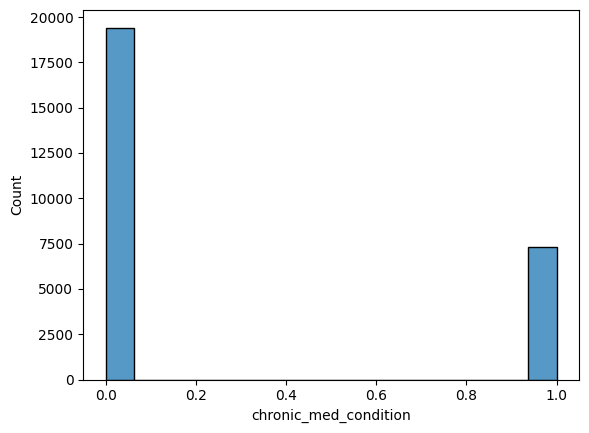

In [102]:
sns.histplot(data=raw_train_features['chronic_med_condition'])
# 大多数人群是健康的

<Axes: xlabel='child_under_6_months', ylabel='Count'>

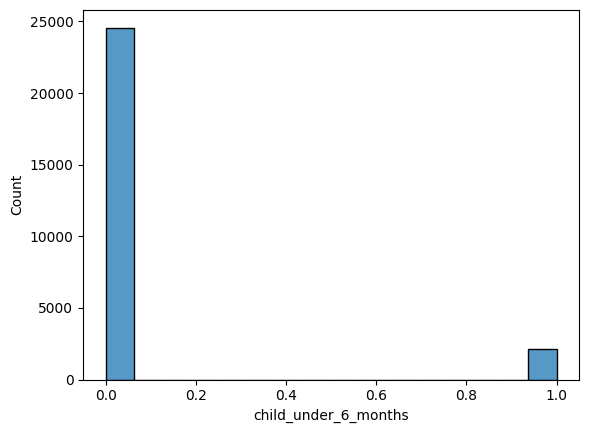

In [103]:
sns.histplot(data=raw_train_features['child_under_6_months'])
# 只有少数人经常与六月以下的儿童接触

<Axes: xlabel='health_worker', ylabel='Count'>

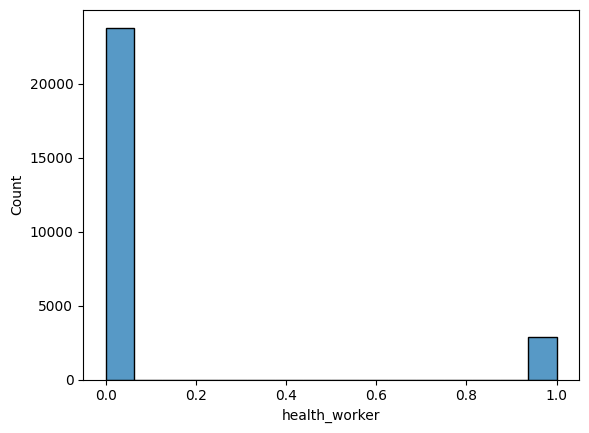

In [104]:
sns.histplot(data=raw_train_features['health_worker'])
# 只有少数人是医护工作者

<Axes: xlabel='health_insurance', ylabel='Count'>

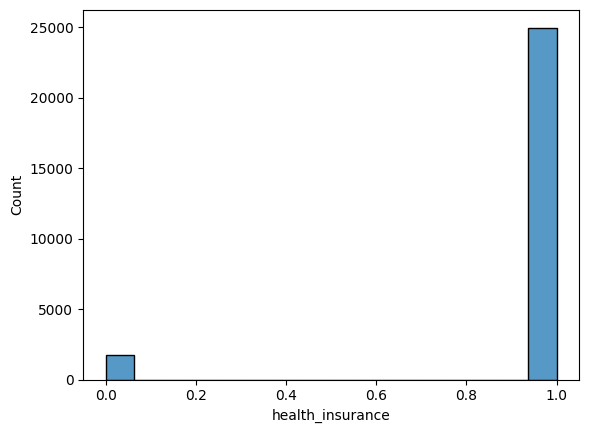

In [105]:
sns.histplot(data=raw_train_features['health_insurance'])
# 大多数人都有医疗保险

<Axes: xlabel='opinion_h1n1_vacc_effective', ylabel='Count'>

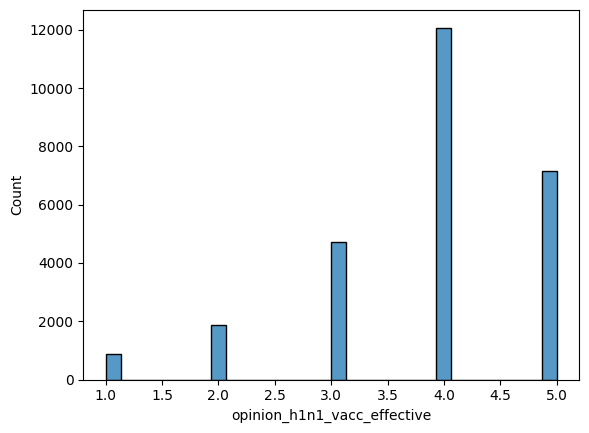

In [106]:
sns.histplot(data=raw_train_features['opinion_h1n1_vacc_effective'])
# 大多数人都认为H1N1流感疫苗有不同程度上的效果

<Axes: xlabel='opinion_h1n1_risk', ylabel='Count'>

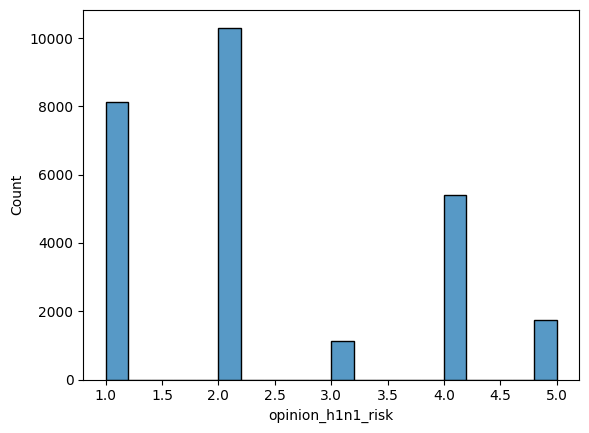

In [107]:
sns.histplot(data=raw_train_features['opinion_h1n1_risk'])
# 大多数人认为即使不接种H1N1流感疫苗也不容易患上H1N1流感

<Axes: xlabel='opinion_h1n1_sick_from_vacc', ylabel='Count'>

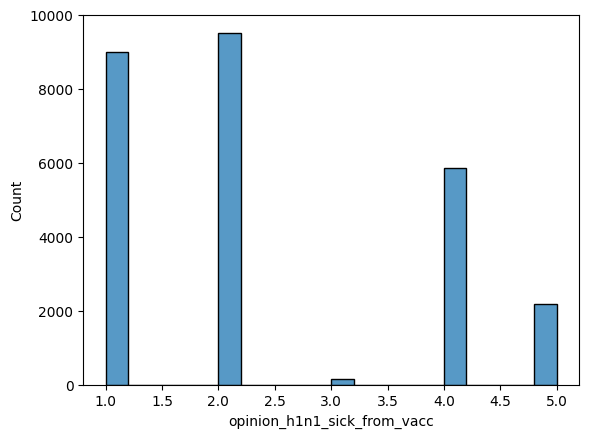

In [108]:
sns.histplot(data=raw_train_features['opinion_h1n1_sick_from_vacc'])
# 大多数人认为接种H1N1流感疫苗后不需要过多担心

<Axes: xlabel='opinion_seas_vacc_effective', ylabel='Count'>

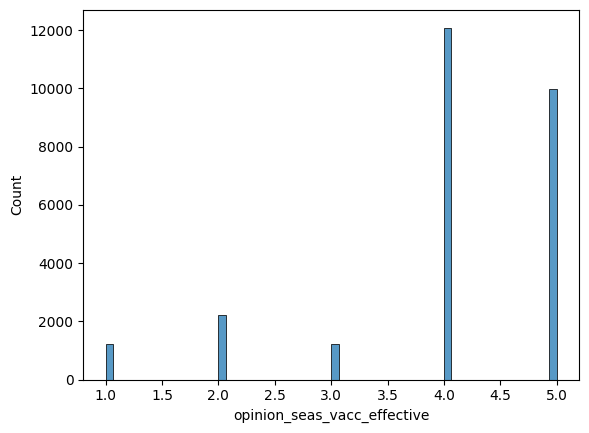

In [109]:
sns.histplot(data=raw_train_features['opinion_seas_vacc_effective'])
## 大多数人都认为季节性流感疫苗有不同程度上的效果

<Axes: xlabel='opinion_seas_risk', ylabel='Count'>

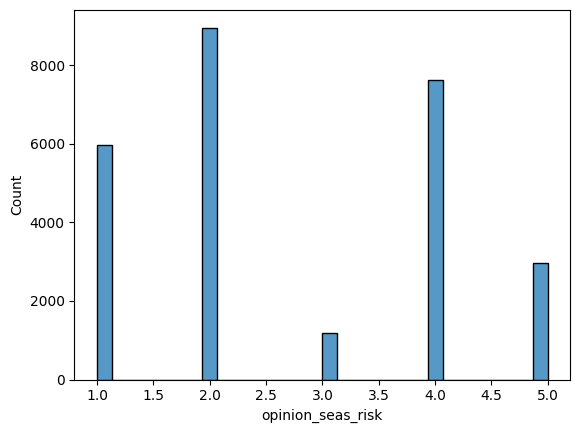

In [110]:
sns.histplot(data=raw_train_features['opinion_seas_risk'])
# 大多数人认为即使不接种季节性流感疫苗也不容易患上季节性流感

<Axes: xlabel='opinion_seas_sick_from_vacc', ylabel='Count'>

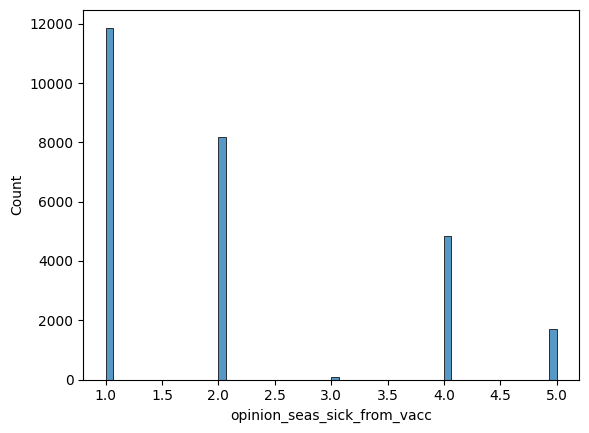

In [111]:
sns.histplot(data=raw_train_features['opinion_seas_sick_from_vacc'])
# 大多数人认为接种季节性流感疫苗后不需要过多担心

<Axes: xlabel='age_group', ylabel='Count'>

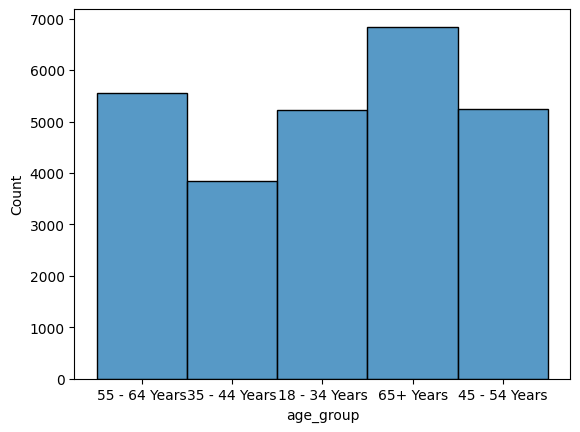

In [112]:
sns.histplot(data=raw_train_features['age_group'])
# 受访人群的年龄分布较为平均

<Axes: xlabel='education', ylabel='Count'>

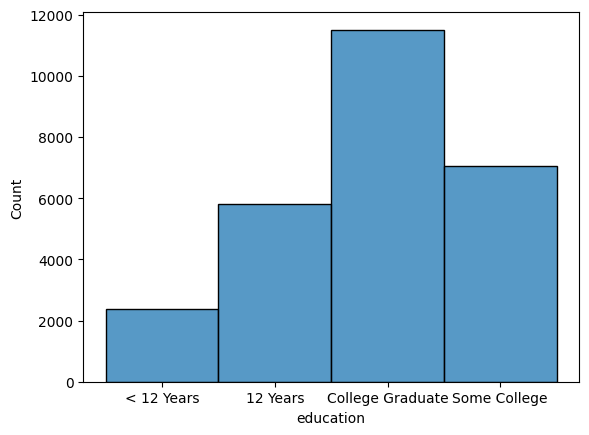

In [113]:
sns.histplot(data=raw_train_features['education'])
# 绝大多数受访人群都接受了至少12年的教育

<Axes: xlabel='race', ylabel='Count'>

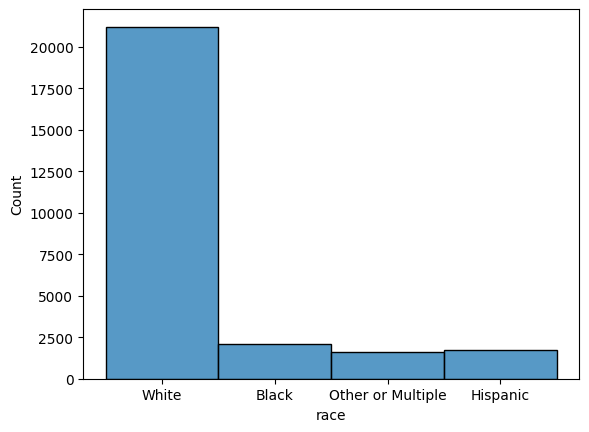

In [114]:
sns.histplot(data=raw_train_features['race'])
# 受访人群大多数是白人

<Axes: xlabel='sex', ylabel='Count'>

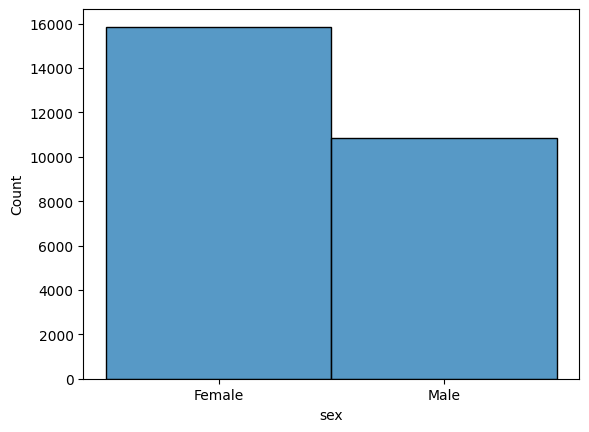

In [115]:
sns.histplot(data=raw_train_features['sex'])
# 受访人群中女性稍微多于男性

<Axes: xlabel='income_poverty', ylabel='Count'>

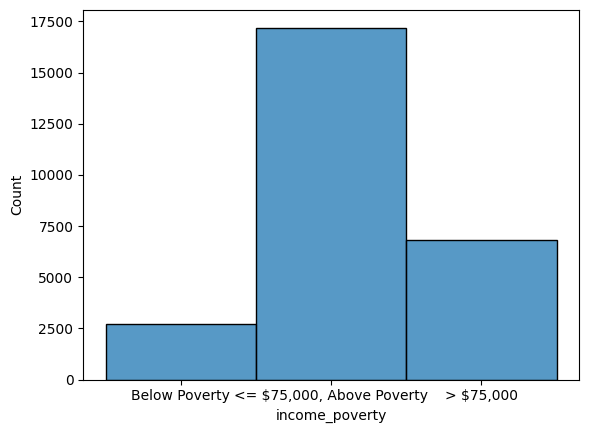

In [116]:
sns.histplot(data=raw_train_features['income_poverty'])
# 受访人群中只有少部分是贫困收入人群

<Axes: xlabel='marital_status', ylabel='Count'>

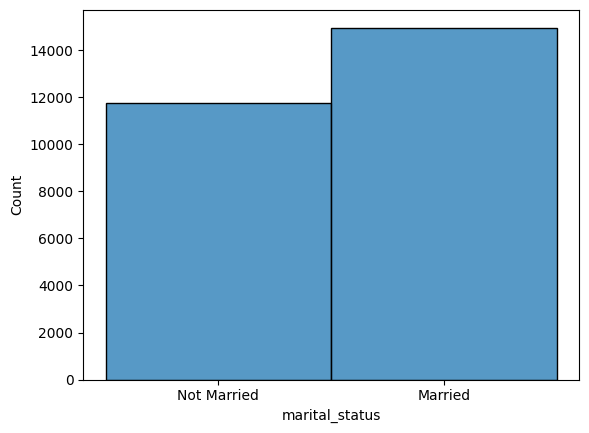

In [117]:
sns.histplot(data=raw_train_features['marital_status'])
# 受访人群中已婚率多于未婚

<Axes: xlabel='rent_or_own', ylabel='Count'>

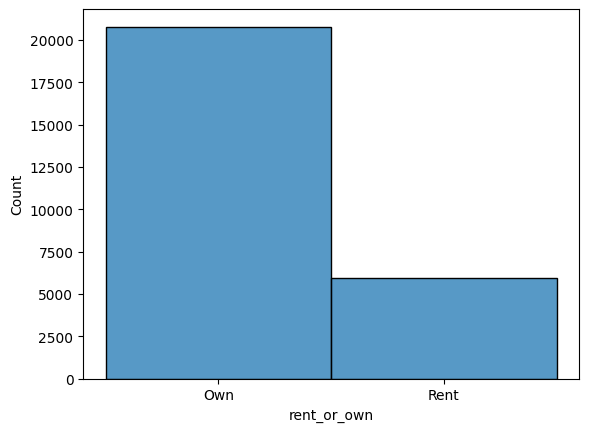

In [118]:
sns.histplot(data=raw_train_features['rent_or_own'])
# 受访人群中大部分已经有自己的房子

<Axes: xlabel='employment_status', ylabel='Count'>

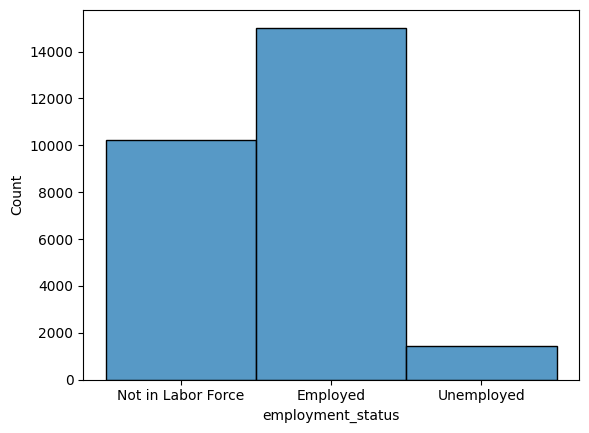

In [119]:
sns.histplot(data=raw_train_features['employment_status'])
# 受访人群中只有少数人是失业人群，就业人群中劳动力占多数

<Axes: xlabel='hhs_geo_region', ylabel='Count'>

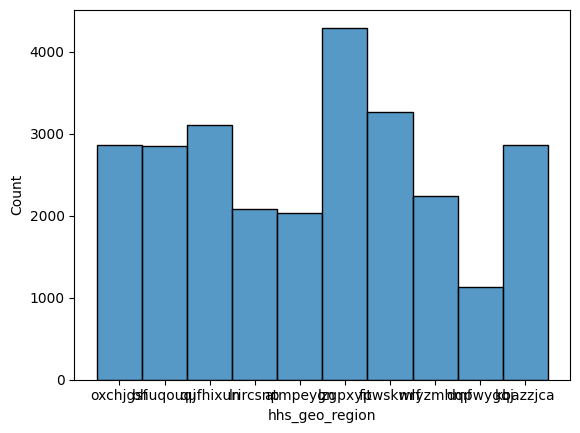

In [120]:
sns.histplot(data=raw_train_features['hhs_geo_region'])
# 受访人群的地区分布不均

<Axes: xlabel='census_msa', ylabel='Count'>

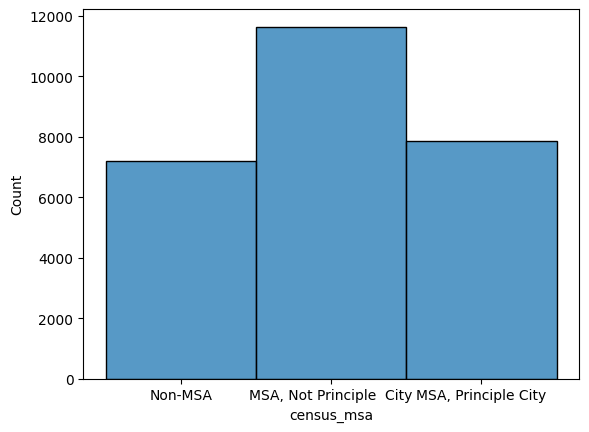

In [121]:
sns.histplot(data=raw_train_features['census_msa'])
# 受访人群大部分在MSA内

<Axes: xlabel='household_adults', ylabel='Count'>

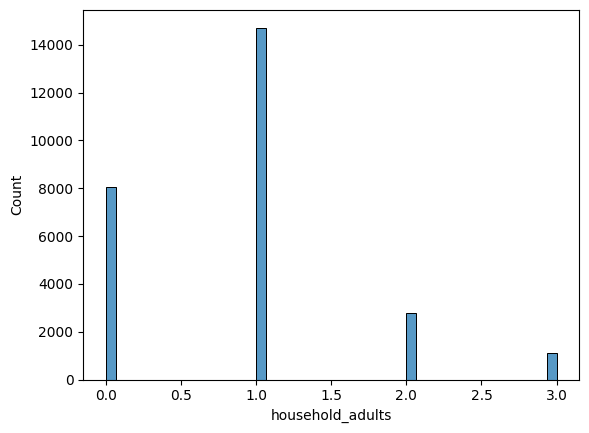

In [122]:
sns.histplot(data=raw_train_features['household_adults'])
# 大多数家庭中的其他成人数量为0或1

<Axes: xlabel='household_children', ylabel='Count'>

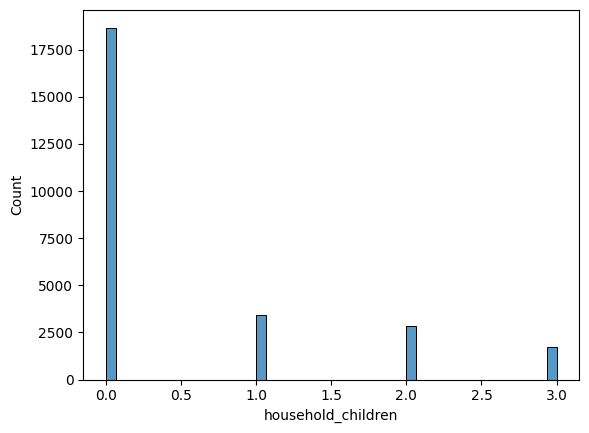

In [123]:
sns.histplot(data=raw_train_features['household_children'])
# 大多数家庭的孩童数量为0

In [124]:
# 需要进行 OntHot 编码的特征
one_hot_features = ["h1n1_concern", "h1n1_knowledge", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]
# 需要进行 Label 编码的特征
label_features = ["age_group", "education", "race", "sex", "income_poverty", "marital_status", "rent_or_own", "employment_status", "hhs_geo_region", "census_msa", "employment_industry", "employment_occupation"]
# 需要进行 Normalization 的特征
normalization_features = ["household_adults", "household_children"]

raw_train_features = pd.get_dummies(raw_train_features, columns=one_hot_features)
raw_test_features = pd.get_dummies(raw_test_features, columns=one_hot_features)

def getLabels (df, features):
    for feature in features:
        label = 0
        labels = {}
        for value in df[feature].unique():
            labels[value] = label
            label = label + 1
        df[feature] = df[feature].map(labels)

getLabels(raw_train_features, label_features)
getLabels(raw_test_features, label_features)

raw_train_features[normalization_features] = (raw_train_features[normalization_features] - raw_train_features[normalization_features].mean()) / raw_train_features[normalization_features].std()
raw_test_features[normalization_features] = (raw_test_features[normalization_features] - raw_test_features[normalization_features].mean()) / raw_test_features[normalization_features].std()


In [125]:
train_data = pd.merge(raw_train_features, train_labels, on="respondent_id")
train_data.drop(columns="respondent_id", inplace=True)

<Axes: >

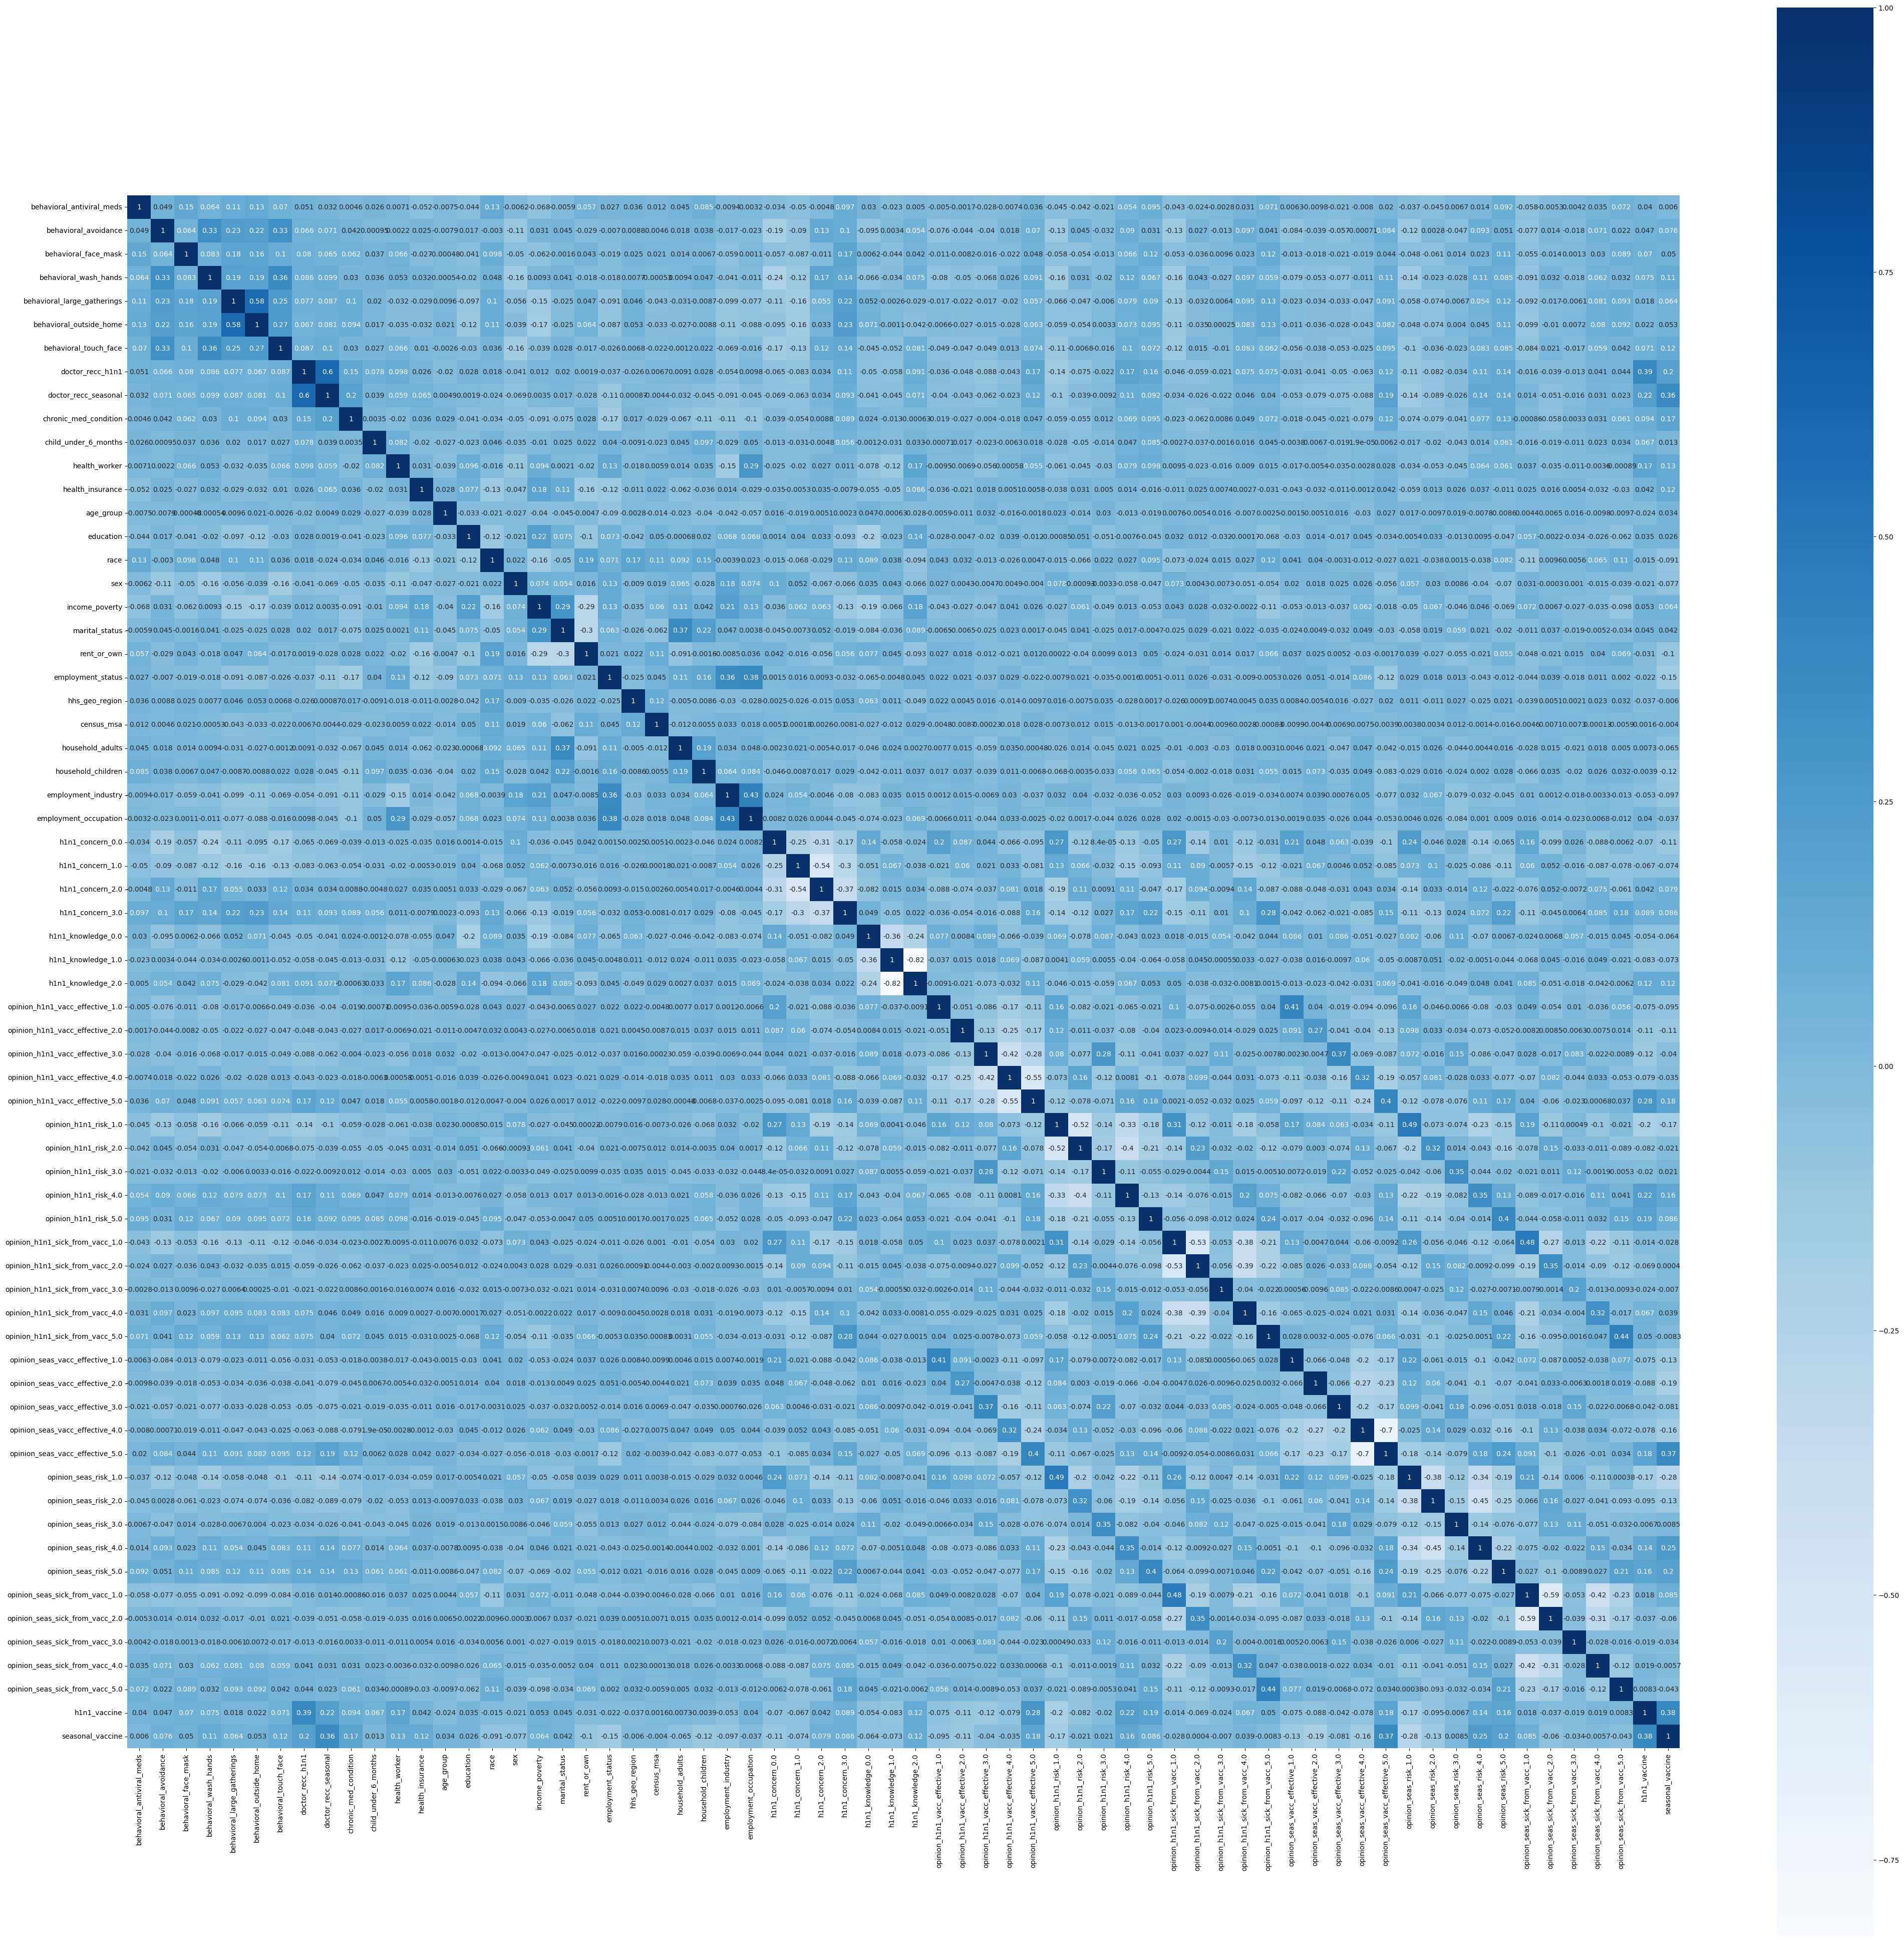

In [126]:
# 绘制协方差图
plt.subplots(figsize=(50, 50))
sns.heatmap(train_data.corr(), annot=True, vmax=1, square=True, cmap="Blues")

In [127]:
train_data.to_csv("./TrainData.csv", index=False)
raw_test_features.to_csv("./TestFeatures.csv", index=False)